In [ ]:
# a jupyter lab notebook
# I recommend using jupyter lab to visualize / plot etc the data

In [ ]:
############################################################
# RUN THE FOLLOWING ONLY ONCE - TO DOWNLOAD DATA
############################################################

In [ ]:
# different models:
# - Barents-2.5km: ice information (possible alternative to the hand drawn ice charts, based on remote sensing + data assimilation); can be used if hour by hour sea ice information is needed for plotting
# - NORA3: wave information: https://thredds.met.no/thredds/catalog/nora3_subset_wave/wave_subset/catalog.html (actually, does not cover the region of interest - drop)
# - WAM4_WAVE: wave information: https://thredds.met.no/thredds/catalog/fou-hi/mywavewam4archive/catalog.html

In [ ]:
############################################################

In [ ]:
# the url to download for Barents-2.5km
# the different dates are encoded in the URL: see the last series of digits: YYYYMMDDHH, HH is always 00, the rest updates periodically
# for more information, see: https://thredds.met.no/thredds/catalog/barents25km_files/catalog.html
# each file should contain 1 day of data
url_Barents = "https://thredds.met.no/thredds/fileServer/barents25km_files/Barents-2.5km_ZDEPTHS_his.an.2020082900.nc"

In [ ]:
# these are large files - it may take a bit of time to get them, and several GB of space
# remember to gitignore the file or GH will reject you push :)
!wget $url_Barents

In [ ]:
############################################################

In [ ]:
# drop: does not cover the area of interest
# the url to download for NORA3 waves subset
# here you get 1 month at a time, see the URL: YYYYMM:
# https://thredds.met.no/thredds/fileServer/nora3_subset_wave/wave_subset/202009_NORA3wave_sub.nc
# url_NORA3wave = "https://thredds.met.no/thredds/fileServer/nora3_subset_wave/wave_subset/202009_NORA3wave_sub.nc"

In [ ]:
# drop: does not cover the area of interest
# !wget $url_NORA3wave

In [ ]:
############################################################

In [ ]:
# the url to download for WAM4 waves data
# here you get model runs, each day, run at UTC time 00, 06, 12, 18; to get the best data, find the run "just before" the data you need
# for example, to show data from 2020-08-29T17:00:00+00:00, use the run from 2020 08 29 T12
# browsable at: https://thredds.met.no/thredds/catalog/fou-hi/mywavewam4archive/2020/09/29/catalog.html
url_WAM4_wave = "https://thredds.met.no/thredds/fileServer/fou-hi/mywavewam4archive/2020/08/29/MyWave_wam4_WAVE_20200829T12Z.nc"

In [ ]:
!wget $url_WAM4_wave

In [ ]:
# check the file
!ls -lrth | grep .nc

In [ ]:
############################################################
# RUN THE FOLLOWING AS OFTEN AS YOU WANT - TO PLOT
############################################################

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import datetime
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
xr_df_barents_25 = xr.open_dataset("./Barents-2.5km_ZDEPTHS_his.an.2020082900.nc")

In [3]:
# have a look at the file
# note that the model itself has variables such as ice_concentration, ice_thickness, ice_u, ice_v
xr_df_barents_25

<xarray.Dataset>
Dimensions:                  (time: 24, depth: 16, Y: 949, X: 739, s_rho: 42,
                              s_w: 43)
Coordinates:
  * X                        (X) float32 2.786e+05 2.811e+05 ... 2.124e+06
  * Y                        (Y) float32 -8.979e+05 -8.954e+05 ... 1.472e+06
  * depth                    (depth) float64 0.0 3.0 10.0 ... 1e+03 2e+03 3e+03
    lat                      (Y, X) float64 ...
    lon                      (Y, X) float64 ...
  * time                     (time) datetime64[ns] 2020-08-29 ... 2020-08-29T...
Dimensions without coordinates: s_rho, s_w
Data variables: (12/21)
    AKs                      (time, depth, Y, X) float32 ...
    Cs_r                     (s_rho) float64 ...
    Cs_w                     (s_w) float64 ...
    Uwind                    (time, Y, X) float32 ...
    Vwind                    (time, Y, X) float32 ...
    angle                    (Y, X) float64 ...
    ...                       ...
    sea_mask                 (Y, X) float64 ...
    temperature              (time, depth, Y, X) float32 ...
    u                        (time, depth, Y, X) float32 ...
    v                        (time, depth, Y, X) float32 ...
    w                        (time, depth, Y, X) float32 ...
    zeta                     (time, Y, X) float32 ...
Attributes: (12/30)
    file:              /home/havis/run/barents-2.5km/ocean_his_AN.nc
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS history file
    title:             Barents-2.5km - ROMS
    var_info:          /home/havis/sea/ROMS/metroms_apps/barents-2.5km/includ...
    rst_file:          /home/havis/run/barents-2.5km/ocean_rst.nc
    ...                ...
    compiler_flags:    -xHost  -I/lustre/storeB/users/josteinb/metroms_run/ro...
    tiling:            003x036
    ana_file:          ROMS/Functionals/ana_btflux.h, ROMS/Functionals/ana_sr...
    CPP_options:       BARENTS, ADD_FSOBC, ADD_M2OBC, ALBEDO, ANA_BSFLUX, ANA...
    NCO:               "4.5.4"
    history:           Sun Aug 30 22:32:05 2020: ncks -O --4 -d time,15986592...

In [4]:
# xr_df_nora3_waves = xr.open_dataset("./202009_NORA3wave_sub.nc")

In [5]:
# xr_df_nora3_waves

In [6]:
xr_df_wam4 = xr.open_dataset("./MyWave_wam4_WAVE_20200829T12Z.nc")

In [7]:
xr_df_wam4_latloncoords = xr_df_wam4.set_coords(("latitude", "longitude"))

In [8]:
xr_df_wam4_latloncoords

<xarray.Dataset>
Dimensions:                  (rlat: 1026, rlon: 624, time: 73)
Coordinates:
  * rlat                     (rlat) float32 -14.35 -14.31 -14.27 ... 26.61 26.65
  * rlon                     (rlon) float32 5.53 5.57 5.61 ... 30.37 30.41 30.45
  * time                     (time) datetime64[ns] 2020-08-29T06:00:00 ... 20...
    latitude                 (rlat, rlon) float64 ...
    longitude                (rlat, rlon) float64 ...
Data variables: (12/42)
    ff                       (time, rlat, rlon) float32 ...
    dd                       (time, rlat, rlon) float32 ...
    FV                       (time, rlat, rlon) float32 ...
    DC                       (time, rlat, rlon) float32 ...
    CP                       (time, rlat, rlon) float32 ...
    hs                       (time, rlat, rlon) float32 ...
    ...                       ...
    sdy                      (time, rlat, rlon) float32 ...
    utrs                     (time, rlat, rlon) float32 ...
    vtrs                     (time, rlat, rlon) float32 ...
    projection_3             int32 ...
    depth                    (rlat, rlon) float64 ...
    forecast_reference_time  datetime64[ns] ...
Attributes:
    Conventions:                CF-1.6
    title:                      MyWAVEWAM
    institution:                Norwegian Meteorological Institute
    source:                     WAM wave model modified version cycle 4.5.4
    comment:                    Original grid rotated
    history:                    Sat Aug 29 15:01:31 2020: ncks -A -v forecast...
    history_of_appended_files:  Sat Aug 29 15:01:31 2020: Appended file W4km_...
    NCO:                        "4.6.3"

In [9]:
# time_to_plot = datetime.datetime(2020, 8, 29, 13, 0, 0, tzinfo=datetime.timezone.utc)  # would be better with the utc timestamp, but np datetime is a mess, and removing it actually makes things better
time_to_plot = datetime.datetime(2020, 8, 29, 17, 0, 0)

In [10]:
selected_sea_ice_concentration = xr_df_barents_25.sel(time=time_to_plot)["ice_concentration"]

In [11]:
time_slice_xr_df_barents_25 = xr_df_barents_25.sel(time=time_to_plot)

In [12]:
time_nanopenwater_xr_df_barents_25 = time_slice_xr_df_barents_25["ice_concentration"].where(time_slice_xr_df_barents_25["ice_concentration"] > 0.03, math.nan, math.nan)
# time_nanopenwater_xr_df_barents_25 = time_slice_xr_df_barents_25["ice_concentration"].where(time_slice_xr_df_barents_25["ice_concentration"] > 0.03, 0.0, 0.0)

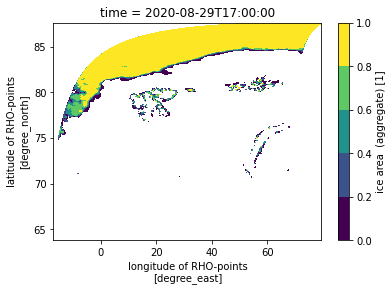

In [13]:
time_nanopenwater_xr_df_barents_25.plot.contourf(x="lon", y="lat")

In [14]:
selected_swell_hs = xr_df_wam4_latloncoords.sel(time=time_to_plot)["hs_swell"]
selected_swell_direction = xr_df_wam4_latloncoords.sel(time=time_to_plot)["thq_swell"]
selected_swell_peak_period = xr_df_wam4_latloncoords.sel(time=time_to_plot)["tp_swell"]

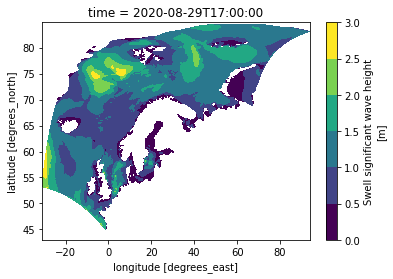

In [15]:
# show the full domain
# note that location with sea ice is "no data"
selected_swell_hs.plot.contourf(x="longitude", y="latitude")
plt.show()

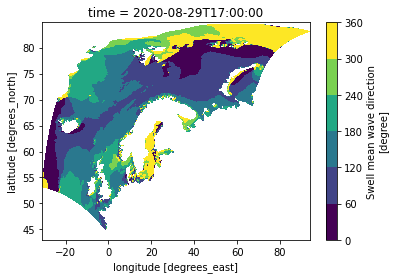

In [16]:
selected_swell_direction.plot.contourf(x="longitude", y="latitude")
plt.show()

# from this plot, and in agreement with ncdump -h output, this is the direction TO, relative to North, in degrees

In [17]:
xr_df_wam4_latloncoords["thq_swell_v"] = np.cos(np.pi / 180.0 * xr_df_wam4_latloncoords["thq_swell"])
xr_df_wam4_latloncoords["thq_swell_u"] = np.sin(np.pi / 180.0 * xr_df_wam4_latloncoords["thq_swell"])

In [18]:
# too many arrows

# xr_df_wam4_latloncoords.sel(time=time_to_plot).plot.quiver(x="longitude", y="latitude", u="thq_swell_u", v="thq_swell_v")
# plt.show()

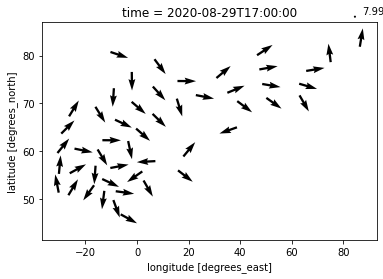

In [19]:
# illustrate how to reduce the number of arrows: slice first

xr_df_wam4_latloncoords.sel(time=time_to_plot).isel(rlat=slice(None, None, 100), rlon=slice(None, None, 100)).plot.quiver(x="longitude", y="latitude", u="thq_swell_u", v="thq_swell_v")
plt.show()

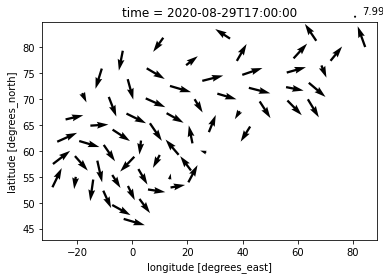

In [20]:
# illustrate how to reduce the number of arrows: coarser and local averaging

xr_df_wam4_latloncoords.sel(time=time_to_plot).coarsen(rlat=100, rlon=100, boundary="pad").mean().plot.quiver(x="longitude", y="latitude", u="thq_swell_u", v="thq_swell_v")
plt.show()

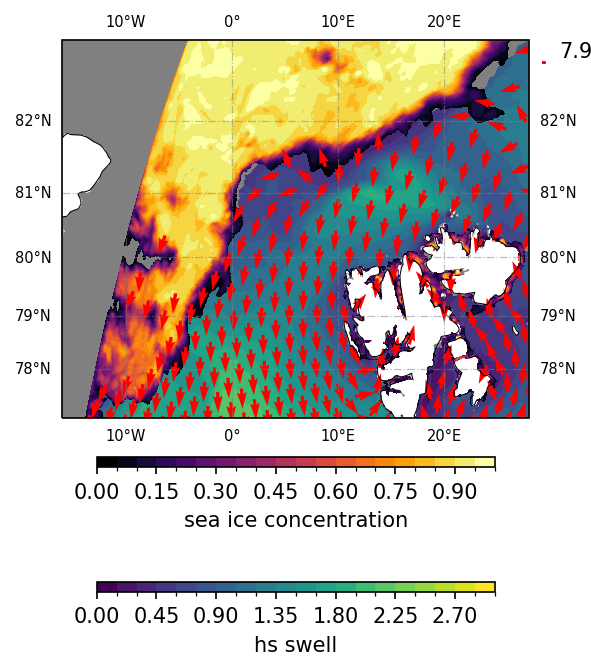

In [21]:
# NOTE: this cell is slow - there are many elements and layers to render
# add the trajectory of the instruments on top of it? adapt the date and time? other?

# now plot as you want!
# see for inspiration, among many others:
# https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html
# https://tutorial.xarray.dev/fundamentals/04.3_geographic_plotting.html
# https://docs.xarray.dev/en/latest/user-guide/plotting.html
# https://medium.com/@lubomirfranko/climate-data-visualisation-with-python-visualise-climate-data-using-cartopy-and-xarray-cf35a60ca8ee
# https://mom6-analysiscookbook.readthedocs.io/en/latest/notebooks/Plotting.html

# --------------------------------------------------
# cartopy map

# First we specify Coordinate Refference System for Map Projection
# We will use Mercator, which is a cylindrical, conformal projection. 
# It has bery large distortion at high latitudes, cannot 
# fully reach the polar regions.
projection = ccrs.Mercator()

# Specify CRS, that will be used to tell the code, where should our data be plotted
crs = ccrs.PlateCarree()

# Now we will create axes object having specific projection 
# make the figure big enough
cm = 1/2.54  # centimeters in inches
plt.figure(dpi=150, figsize=(12*cm, 12*cm))
ax = plt.axes(projection=projection, frameon=True)

# Draw gridlines in degrees over Mercator map
gl = ax.gridlines(crs=crs, draw_labels=True,
                  linewidth=.6, color='gray', alpha=0.5, linestyle='-.')
gl.xlabel_style = {"size" : 7}
gl.ylabel_style = {"size" : 7}

# To plot borders and coastlines, we can use cartopy feature
import cartopy.feature as cf
ax.add_feature(cf.COASTLINE.with_scale("50m"), lw=0.5)
ax.add_feature(cf.BORDERS.with_scale("50m"), lw=0.3)

# Now, we will specify extent of our map in minimum/maximum longitude/latitude
# Note that these values are specified in degrees of longitude and degrees of latitude
# However, we can specify them in any crs that we want, but we need to provide appropriate
# crs argument in ax.set_extent
lon_min = -16
lon_max = 28
lat_min = 77
lat_max = 83

#
ax.add_feature(cf.OCEAN,facecolor=(0.5,0.5,0.5))

#
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .08, 'aspect':40, 'label':'hs swell'}
selected_swell_hs.plot.contourf(x="longitude", y="latitude", ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs, levels=21, cmap="viridis")

#
cbar_kwargs = {'orientation':'horizontal', 'shrink':0.6, "pad" : .08, 'aspect':40, 'label':'sea ice concentration'}
time_nanopenwater_xr_df_barents_25.plot.contourf(x="lon", y="lat", ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs=cbar_kwargs, levels=21, cmap="inferno")

#
skip_factor = 9
xr_df_wam4_latloncoords.sel(time=time_to_plot).isel(rlat=slice(None, None, skip_factor), rlon=slice(None, None, skip_factor)).plot.quiver(x="longitude", y="latitude", u="thq_swell_u", v="thq_swell_v", transform=ccrs.PlateCarree(), scale=23.0, angles="xy", color="red", width=0.007)

# crs is PlateCarree -> we are explicitly telling axes, that we are creating bounds that are in degrees
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=crs)
# plt.title(f"title")
ax.set_title("")

plt.tight_layout()
plt.show()
